<h1 style="text-align: center;"><strong>1. Soluci&oacute;n de Ecuaciones No Lineales</strong></h1>

<h2 style="text-align: center;"><span style="text-decoration: underline; color: #008080;"><strong>Algoritmos</strong></span></h2>

[<strong>M&eacute;todo 1: M&eacute;todo de la Bisecci&oacute;n</strong>](#biseccion)

[<strong>M&eacute;todo 2:Newton;</strong>](#newton)

[<strong>M&eacute;todo 3:Secante</strong>](#secante)

[<strong>M&eacute;todo 4:Falsa posicion</strong>](#falsapos)

[<strong>M&eacute;todo 5:Muller</strong>](#muller)

[<strong>M&eacute;todo 6:Punto Fijo</strong>](#puntofijo)

<a id='biseccion'></a>
<h2><span style="color: #993300;"><span style="text-decoration: underline;"><strong>M&eacute;todo 1:</strong> M&eacute;todo de la Bisecci&oacute;n</span></span></h2>

<h3><strong>a) Formulaci&oacute;n Matem&aacute;tica</strong></h3>


Determinamos valores aproximados de $x$ con la formula:

$$ x_{k} = \frac{a_{k}+b_{k}}{2}$$
$$I_{k+1}=\left [ a_{k+1}, b_{k+1} \right ] = \left\{\begin{matrix}
 [ a_k, x_k]& \textrm{si} & f(a_k)f(x_k)<0\\ 
 [ x_k,b_k]& \textrm{si} & f(a_k)f(x_k)>0 
\end{matrix}\right.$$
   
Asi como el error absoluto asociado:
$$e_k=|x_k-x| \le \frac{b-a}{2^k}$$


<h3><strong>b) Valores Iniciales</strong></h3>


* Dos valores $a$ y $b$ tal que $f(a)f(b)\le 0$

<h3><strong>c) Ventajas y Desvantajas</strong></h3>

**Ventajas**


* Converge en todos los casos.
* Util como aproximación inicial de otros metodos.

**Desventajas**


* No toma en cuenta la magnitud de los valores de la función en las aproximaciones calculadas $x_k$, solo tiene en cuenta el signo de $f(x)$.
* Posee tipo de convergencia lenta.

<h3><strong>d) Pasos del m&eacute;todo (Pseudoc&oacute;digo)</strong></h3>

<div class="alert alert-block alert-info">
    
    
<p><span style="text-decoration: underline;"><span style="text-decoration: underline;"><strong>Valores Iniciales:</strong></span></span> Num&eacute;ros $a, b\in\mathbb{R}$</p>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 1:</span> Verificar que $f(a)f(b) \le 0$</p>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 2:</span> Calcular $x_{k}$ = $\tfrac{a+b}{2}$ y dividir $[a,b]$ en 2 intervalos [a,$x_{k}$] y [$x_{k}$,b]. </p>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 3:</span>  Realice las siguientes evaluaciones para determinar en qué intervalo cumple la condición de Bolzano: </p>
<ul style="list-style-type:square;">
          <li>Si $f(a) f(x_{k}) 	\leq  0$, entonces la raíz se encuentra dentro del intervalo izquierdo. Por lo tanto, haga $b = x_{k}$.</li>
          <li>Si $f(b) f(x_{k}) 	\leq 0$, entonces la raíz se encuentra dentro del intervalo derecho. Por lo tanto, haga $a = x_{k}$.</li>
</ul>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 5:</span> Sea $k=k+1$ y repetir los Pasos 0, 1 y 2 al nuevo intervalo $[a,b]$. </p>

</div>

<h3><strong>e) C&oacute;digo en GNU Octave</strong></h3>

In [12]:
function [x,k,error]=biseccion (f,a,b,tol,iterMax)

    %Esta función aproxima la solución de la ecuación f(x)=0, utilizando el método de la bisección
    %
    %Sintaxis:  biseccion(f,a,b,tol,iterMax)
    % 
    %Parámetros Iniciales: 
    %            f = una  cadena de caracteres (string) que representa a la función f
    %            a,b = son los extremos del intervalo [a,b]
    %            tol = un número positivo que representa a la tolerancia para el criterio |f(x_k)|<tol
    %            iterMax = cantidad de iteraciones máximas
    %            
    %Parámetros de Salida:                           
    %            x = aproximación del cero de la función f
    %            k = número de iteraciones realizados
    %            error =  |f(x)|

    aux = strcat('@(x)',f); % @x + función
    f1 = str2func(aux); % función string a ecuación

    if f1(a)*f1(b)>0
        x=[]; k=[]; error=[];
        display('El teorema de Bolzano no se cumple, es decir, f(a)*f(b)>0')
    else
        k=0;
        error=tol+1;
        e=[];
        while and(error>tol,k<iterMax)
            k=k+1;
            x=(a+b)/2;
            error=abs(f1(x));
            e=[e error];
            if f1(a)*f1(x)<0
                b=x;
            else
                a=x;
            end
        end
        plot(1:k,e)
    end
end


<h3><strong>f) C&oacute;digo en Python</strong></h3>

In [10]:
#Librerias

import math
import matplotlib.pyplot as plt
from sympy import *

def f(x):
    return math.exp(x)-x-2

def biseccion(f1,a,b,tol,iterM):
    #Esta función aproxima la solución de la ecuación f(x)=0, utilizando el método de la bisección
    #sintaxis biseccion(f,a,b,tol,iterMax)
    #Entradas:
        #Entra una funcion definida arriba, a su vez dos numeros a y b los cuales
        #seran los valores iniciales para comprobar el teorema de Bolzano
        
    #Salidas:
        #Muestra una grafica con los valores de el error 
        #Muestra la ultima iteracion y su valor calculado
    e=[]
    sol=[]
    #Teorema de Bolzano
    if(f(a)*f(b) > 0):
        print("No cumple con el teorema de Bolzano")
    else:
        k=0
        error=tol+1
        while (k < iterM) and (error>tol):
            k+=1
            x=(b+a)/2
            error=abs(f(x))
            if(f(a)*f(x)<0):
                b=x
            else:
                a=x
            e=e+[error]
            sol = sol + [x]
            
    #Grafica el valor de las distintas soluciones
    plt.plot(e)
    #El valor de la ultima iteracion se muestra
    print("x = ",x)
    print("k = " ,k)
    print("error = ",error)

    

<h3><strong>g) Ejemplo Num&eacute;rico</strong></h3>

<div class="alert alert-block alert-info">
    
Determinar la solucion de la ecuacion: 
$$e^x-x=2$$
* Utilizando 40 iteraciones maximas
* Intervalo $[0,2]$
</div>

x =  1.1462
k =  27
error =  0.0000000012681


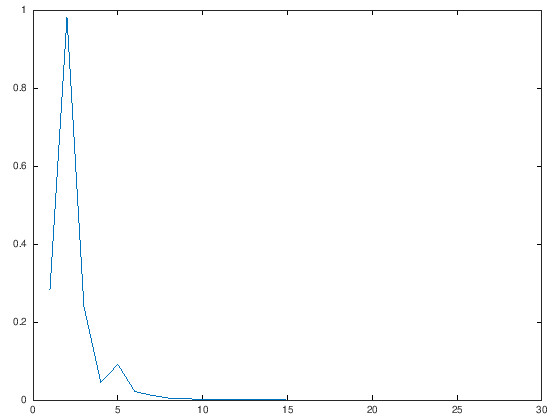

In [13]:
# Solución del ejemplo utilizando Octave
[x,k,error]=biseccion('exp(x)-x-2',0,2,10^-8,40)

x =  1.1461932212114334
k =  27
error =  1.2680798633368795e-09


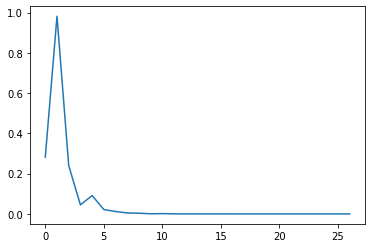

In [11]:
# Solución del ejemplo utilizando Python
biseccion(f,0,2,pow(10, -8),40)

<a id='newton'></a>
<h2><span style="color: #993300;"><span style="text-decoration: underline;"><strong>M&eacute;todo 2:</strong> M&eacute;todo de Newton</span></span></h2>

<h3><strong>a) Formulaci&oacute;n Matem&aacute;tica</strong></h3>

$$x_{k+1}=x_k-\frac{f(x_k)}{f'(x_k)}$$
con $f'(x_k) \neq 0$

<h3><strong>b) Valores Iniciales</strong></h3>

* Se da un valor inicial $x_0$ el cual es un numero real.

<h3><strong>c) Ventajas y Desvantajas</strong></h3>

**Ventajas**

* Método de Newton-Raphson es de los más reconocido y eficiente para la resolución del problema de búsqueda de raíces.
* El método de newton es eficiente en la solución de sistemas de ecuaciones no lineales.
* El método converge muy r´apidamente y proporciona una muy buena precisi´on en los resultados.

**Desventajas**

* Lenta convergencia.
* Requiere la evaluaci´on de una derivada.
* Cuando un punto de inflexión, $f''(x) = 0$, ocurre en la vecindad de una raíz.
* No posee un criterio general de convergencia.



<h3><strong>d) Pasos del m&eacute;todo (Pseudoc&oacute;digo)</strong></h3>

<div class="alert alert-block alert-info">
    
    
<p><span style="text-decoration: underline;"><span style="text-decoration: underline;"><strong>Valores Iniciales:</strong></span></span> Num&eacute;ros $x_0 \in\mathbb{R}$</p>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 1:</span>  Determinar el valor algebraico de la derivada $f'$ </p>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 2:</span>  Verificar que $f'(x_0)$ no sea 0</p>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 3:</span>  Utilizar la formula del metodo</p>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 4:</span>  Recalcular x_0 y repetir recursivamente</p>


</div>

<h3><strong>e) C&oacute;digo en GNU Octave</strong></h3>

In [1]:
pkg load symbolic;

function [df] = derivar(f,x)
    aux = strcat('@(x)',f); 
    f1 = str2func(aux);
    h=0.000000001;
    df = (f1(x + h) - f1(x)) / h;
endfunction

function [x,k,error]=newton(f,x0,tol,iterMax)
    
    %Esta función aproxima la solución de la ecuación f(x)=0, utilizando el método de la newton
    %
    %Sintaxis:  newton(f,x0,tol,iterMax)
    % 
    %Parámetros Iniciales: 
    %Entra una funcion definida arriba, por el parametro de entrada x0 
    %utilizads en la formula recursiva          
    %            
    %            
    %Parámetros de Salida:                           
    %Muestra una grafica con los valores de el error 
    %Muestra la ultima iteracion y su valor calculado           
    %  
    aux = strcat('@(x)',f); % @x + función
    f1 = str2func(aux); % función string a ecuación

    
    x=[]; k=[]; error=[];

    k=0;
    error=tol+1;
    e=[];
        while and(error>tol,k<iterMax)
            
            k=k+1;
            x= x0-(f1(x0)/(derivar(f,x0)));
            error=abs(f1(x));
            e=[e error];
            x0=x;
        end
        plot(1:k,e)
end

<h3><strong>f) C&oacute;digo en Python</strong></h3>

In [6]:
import math
import matplotlib.pyplot as plt
from sympy import *

def f(x):   # Se crea la funcion a trabajar (Se debe cambiar aca)
    funcion = log(4*x/3)-2*cos(x)+0.5
    return funcion

def derivar(x):  # Se calcula la derivada por definicion
    h = 0.000000001
    derivada = (f(x + h) - f(x)) / h
    return derivada


def newton(f1,x0,tol,iterM):
    #Entradas:
    #Entra una funcion definida arriba, a su vez dos numeros x0 
    #seran los valores iniciales utilizados en la formula recursiva
        
    #Salidas:
        #Muestra una grafica con los valores de el error 
        #Muestra la ultima iteracion y su valor calculado
    e=[]
    sol=[]
    k=0
    error=tol+1
    if (derivar(x0) == 0):
        print("error derivada se hace cero en", x0)
    while (k < iterM) and (error>tol):
        xk= x0-(f1(x0)/derivar(x0))
        error=abs(f1(xk))
        k+=1
        x0=xk
        e=e+[error]
        sol = sol + [xk]

    #Grafica el valor de las distintas soluciones
    plt.plot(e)
    #El valor de la ultima iteracion se muestra
    print("x = ",xk)
    print("k = " ,k)
    print("error = ",error)


<h3><strong>h) Ejemplo numérico</strong></h3>

<div class="alert alert-block alert-info">
    
Determinar la solucion de la ecuacion: 
$$\ln\left ( \frac{4}{3}x \right )=2\cos(x)-\frac{1}{2}$$
* Utilizando 10 iteraciones maximas
* Utilizando como valor inicial $x_0=1.5$
</div>

x =  1.1090
k =  2
error =  0.00000066548


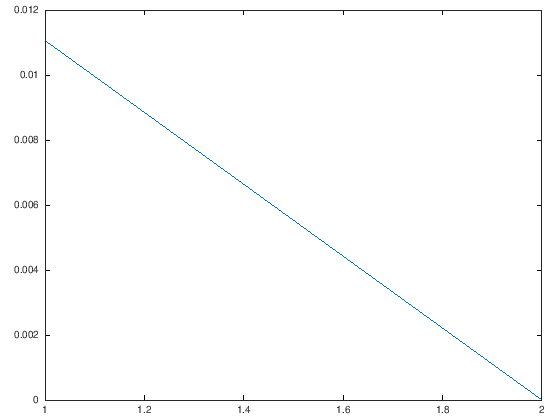

In [3]:
[x,k,error]=newton('log(4*x/3)-2*cos(x)+0.5',1.5,10^-2,10)

x =  1.10899029446012
k =  2
error =  6.65476417360811e-7


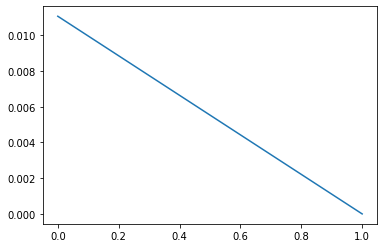

In [7]:
newton(f,1.5,pow(10, -2),10)

<a id='secante'></a>
<h2><span style="color: #993300;"><span style="text-decoration: underline;"><strong>M&eacute;todo 3:</strong> Secante</span></span></h2>

<h3><strong>a) Formulaci&oacute;n Matem&aacute;tica</strong></h3>


$$x_{k+1} = x_{k} - \left(    \frac{x_{k} - x_{k-1}}{f(x_{k})- f(x_{k-1})}  \right) f(x_{k})$$

<h3><strong>b) Valores Iniciales</strong></h3>

* Se necesitan dos valores iniciales $x_0$ y $x_1$ reales.

<h3><strong>c) Ventajas y Desvantajas</strong></h3>

**Ventajas**

* Si la función $f(x)$ es muy compleja, se le puede aplicar sin tener que obtener su derivada.


**Desventajas**

* Su velocidad de convergencia es menor que la de otros métodos.
* Su convergencia no se asegura si la primera aproximación a la raíz no es lo suficientemente cercana a ella, ni tampoco se asegura cuando la raíız es múltiple.


<h3><strong>d) Pasos del m&eacute;todo (Pseudoc&oacute;digo)</strong></h3>

<div class="alert alert-block alert-info">
    
    
<p><span style="text-decoration: underline;"><span style="text-decoration: underline;"><strong>Valores Iniciales:</strong></span></span> Num&eacute;ros $x_0 , x_1\in\mathbb{R}$</p>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 1:</span> Se calcula el valor de $x_{k+1}$ en la formula matematica</p>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 2:</span> Se cambia el valor de $x_0 = x_1$ y luego $x_1=x_{k+1}$ </p>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 3:</span> Se repite el calculo de $x_{k+1}$ con los nuevos valores</p>


</div>

<h3><strong>e) C&oacute;digo en GNU Octave</strong></h3>

In [37]:
function [x,k,error]=secante (f,x0,x1,tol,iterMax)

    %Esta función aproxima la solución de la ecuación f(x)=0, utilizando el método de la secante
    %
    %Sintaxis:  secante(f,a,b,tol,iterMax)
    % 
    %Parámetros Iniciales: 
    %Entra una funcion definida arriba, a su vez dos numeros x0 y x1 los cuales
    %seran los valores iniciales utilizados en la formula recursiva          
    %            
    %            
    %Parámetros de Salida:                           
    %Muestra una grafica con los valores de el error 
    %Muestra la ultima iteracion y su valor calculado           
    %            

    aux = strcat('@(x)',f); % @x + función
    f1 = str2func(aux); % función string a ecuación

    x=[]; k=[]; error=[];

    k=0;
    error=tol+1;
    e=[];
        while and(error>tol,k<iterMax)
            k=k+1;
            x= x1-((x1-x0)/(f1(x1)-f1(x0)))*f1(x1);
            error=abs(f1(x));
            e=[e error];
            x0=x1;
            x1=x;
        end
        plot(1:k,e)
end

<h3><strong>f) C&oacute;digo en Python</strong></h3>

In [22]:
import math
import matplotlib.pyplot as plt


def f(x):
    return math.exp(x)-x-2

def secante(f1,x0,x1,tol,iterM):
    #Entradas:
    #Entra una funcion definida arriba, a su vez dos numeros x0 y x1 los cuales
    #seran los valores iniciales utilizados en la formula recursiva
        
    #Salidas:
        #Muestra una grafica con los valores de el error 
        #Muestra la ultima iteracion y su valor calculado
    e=[]
    sol=[]
    k=0
    error=tol+1
    
    while (k < iterM) and (error>tol):
        xk= x1-((x1-x0)/(f1(x1)-f1(x0)))*f1(x1)
        error=abs(f1(xk))
        k+=1
        x0=x1
        x1=xk
        e=e+[error]
        sol = sol + [xk]

    #Grafica el valor de las distintas soluciones
    plt.plot(e)
    #El valor de la ultima iteracion se muestra
    print("x = ",xk)
    print("k = " ,k)
    print("error = ",error)

<h3><strong>h) Ejemplo numérico</strong></h3>

<div class="alert alert-block alert-info">
    
Determinar la solucion de la ecuacion: 
$$e^x-x=2$$
* Utilizando 40 iteraciones maximas
* Utilizar $x_0=0$ y $x_1=2$
</div>

x =  1.1462
k =  9
error =    7.2298e-13


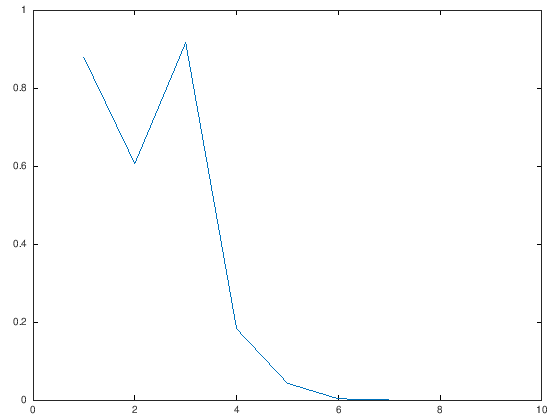

In [35]:
# Solución del ejemplo utilizando Octave
[x,k,error]=secante('exp(x)-x-2',0,2,10^-8,40)

x =  1.1461932206209196
k =  9
error =  7.229772336359019e-13


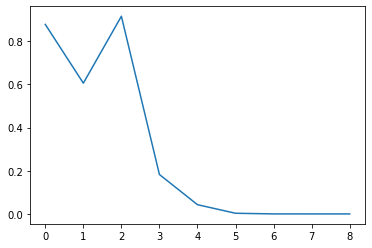

In [23]:
# Solución del ejemplo utilizando Python
secante(f,0,2,pow(10, -8),10)

<a id='falsapos'></a>
<h2><span style="color: #993300;"><span style="text-decoration: underline;"><strong>M&eacute;todo 4:</strong> Falsa posición</span></span></h2>

<h3><strong>a) Formulaci&oacute;n Matem&aacute;tica</strong></h3>

$$ \color{blue} {x_{r} = x_{u} - \frac{f(x_{u})(x_{l}-x_{u})}{f(x_{l}) - f(x_{u})}}$$

<h3><strong>b) Valores Iniciales</strong></h3>

* Itervalo $[a,b]$ con $x_0=a$ y $x_1=b$ tal que $f(x_0)f(x_1)\le 0$

<h3><strong>c) Ventajas y Desvantajas</strong></h3>

**Ventajas**

* Siempre que se conozca la existencia de una ra´ız en el intervalo dado, este convergera.
* Tiende a ser m´as r´apido a la hora de converger, en comparaci´on con m´etodos como el de la biseccion.


**Desventajas**

* Es de caracter unilateral  

<h3><strong>d) Pasos del m&eacute;todo (Pseudoc&oacute;digo)</strong></h3>

<div class="alert alert-block alert-info">
    
    
<p><span style="text-decoration: underline;"><span style="text-decoration: underline;"><strong>Valores Iniciales:</strong></span></span> Intervalo $[a , b]\in\mathbb{R}$</p>
<p><span style="text-decoration: underline;">Paso 1:</span> Se cuenta inicialmente con: $x_0 = a$ y $x_1 = b$. Se debe verificar que $f(x_0)f(x_1) < 0$ y calcular $x_2$ utilizando el metodo de la secante. Sea $a_2 = a$ y $b_2 = b$, donde $x_2 \in [a_2,b_2]$. Para un valor $k ≤ 2$.</p>
<p><span style="text-decoration: underline;">Paso 2:</span> Utilizando el metodo de la Biseccion. Como se tiene que $x_k \in [a_k, b_k]$, entonces el se debe dividir el intervalo en dos secciones, $[a_k, x_k]$ y $[x_k, b_k]$. Se escoge el intervalo donde se garantice que
existe un cero de la funcion. Es decir:
    
* si $f(a_k)f(x_k) < 0$, entonces se escoge el intervalo $[a_k, x_k]$.
* si $f(x_k)f(b_k) < 0$, entonces se escoge el intervalo $[x_k, b_k]$.</p>

<p><span style="text-decoration: underline;">Paso 3:</span> Utilizando el metodo de la Secante. Usando el intervalo seleccionado, se calcula $x_{k+1}$ usando
el metodo de la secante, donde

$$x_{k+1} = x_{k} - \left(    \frac{x_{k} - c_{k}}{f(x_{k})- f(x_{c})}  \right) f(x_{k})$$

* Donde:
$$c_k = \left\{\begin{matrix}
 a_k & \textrm{si}\,\,\textrm{se}\,\,\textrm{selecciona} & [ a_k, x_k]\\ 
 b_k&  \textrm{si}\,\,\textrm{se}\,\,\textrm{selecciona} & [ x_k,b_k] 
\end{matrix}\right.$$
</p>


</div>

<h3><strong>e) C&oacute;digo en GNU Octave</strong></h3>

In [ ]:
function [c]=secante(a, b)
    c = b - (b - a) * f(b) / (f(b) - f(a));  # Otorgar valor a x.
end




function [x,k,error]=punto_fijo(f1,x0,x1,tol,iterM)
    #Entradas:
        #Entra una funcion definida arriba, a su vez dos numeros x0 y x1 los cuales
        #seran los valores iniciales para comprobar el teorema de Bolzano
        
    #Salidas:
        #Muestra una grafica con los valores de x los cuales seran las aproximadas 
        #por cada iteracion y tambien la ultima aproximacion
    e=[]
    sol=[]
    #Teorema de Bolzano
    if(f1(x0)*f1(x1) > 0):
        dislpay("No cumple con el teorema de Bolzano")
    else:
        k=0;
        error=tol+1;
        x3=x0;
        while (error>tol)
            k=k+1;
            x2=Secante(x0, x1);
            
            if(f(x0)*f(x2)<0)
                x3 = Secante(x0, x2);
                x0=x1;
                x1=x2;
            if(f(x1)*f(x2)<0)
                x3 = Secante(x1, x2);
                x0=x1;
                x1=x2;
            error=abs(f(x3));
            e=[e error];
        end
    plot(1:k,e)
end


<h3><strong>f) C&oacute;digo en Python</strong></h3>

In [4]:
import math
import matplotlib.pyplot as plt



def Secante(a, b):
    c = b - (b - a) * f(b) / (f(b) - f(a))  # Otorgar valor a x.
    return c


def f(x):
    return math.exp(x)-x-2 

def Falsa_Posicion(f1,x0,x1,tol,iterM):
    #Entradas:
        #Entra una funcion definida arriba, a su vez dos numeros x0 y x1 los cuales
        #seran los valores iniciales para comprobar el teorema de Bolzano
        
    #Salidas:
        #Muestra una grafica con los valores de x los cuales seran las aproximadas 
        #por cada iteracion y tambien la ultima aproximacion
    e=[]
    sol=[]
    #Teorema de Bolzano
    if(f1(x0)*f1(x1) > 0):
        print("No cumple con el teorema de Bolzano")
    else:
        k=0
        error=tol+1
        x3=x0
        while (k < iterM) and (error>tol):
            k+=1
            x2=Secante(x0, x1)
            
            if(f(x0)*f(x2)<0):
                x3 = Secante(x0, x2)
                x0=x1
                x1=x2
            elif(f(x1)*f(x2)<0):
                x3 = Secante(x1, x2)
                x0=x1
                x1=x2
            error=abs(f(x3))
            e=e+[error]
            sol = sol + [x3]
            #print(e)
            #print(sol)
    #Grafica el valor de las distintas soluciones
    plt.plot(e)
    #El valor de la ultima iteracion se muestra
    print("x = ",x3)
    print("k = " ,k)
    print("error = ",error)

<h3><strong>h) Ejemplo numérico</strong></h3>

<div class="alert alert-block alert-info">
    
Determinar la solucion de la ecuacion: 
$$e^x-x=2$$
* Utilizando 20 iteraciones maximas
* Utilizar tolerancia $10^{-8}$
* Utilizar $x_0=0$ y $x_1=2$
</div>

x =  1.1461932205980407
k =  8
error =  4.8379300565670746e-11


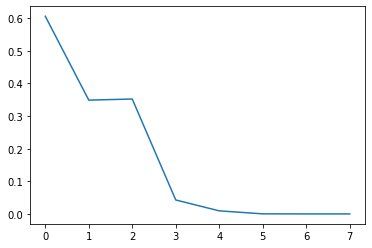

In [5]:
Falsa_Posicion('exp(x)-x-2',0, 2, pow(10, -8),20)

x =  1.1461932205980407
k =  8
error =  4.8379300565670746e-11


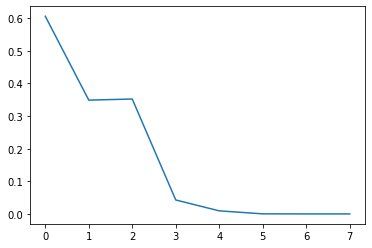

In [2]:
Falsa_Posicion(f,0, 2, pow(10, -8),20)

<a id='muller'></a>
<h2><span style="color: #993300;"><span style="text-decoration: underline;"><strong>M&eacute;todo 5:</strong> Muller</span></span></h2>

<h3><strong>a) Formulaci&oacute;n Matem&aacute;tica</strong></h3>

$$\color{blue} {g(x)=ax^2+bx+c }$$

<h3><strong>b) Valores Iniciales</strong></h3>

* Valores $x_0,x_1,x_2 \in \mathbb{R}$ y una función continua $f$.

<h3><strong>c) Ventajas y Desvantajas</strong></h3>

**Ventajas**
* Al usar la formula cuadratica, es capaz de hallar raıces complejas.

**Desventajas**

* En cada iteracion se descarta una posible ra´ız de la par´abola sin conocer la naturaleza de la misma

<h3><strong>d) Pasos del m&eacute;todo (Pseudoc&oacute;digo)</strong></h3>

<div class="alert alert-block alert-info">
    
    
<p><span style="text-decoration: underline;"><span style="text-decoration: underline;"><strong>Valores Iniciales:</strong></span></span> Num&eacute;ros $x_0 , x_1,x_2\in\mathbb{R}$</p>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 1:</span> Encontrar las funciones cuadráticas que pasan por los puntos: $(x_0,f(x_0))$, $(x_1, f(x_1))$ y
$(x_2; f(x_2))$.</p>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 2:</span> Encontrar el valor de $r$ mediante la fórmula cuadratica racionalizada. Inmediatamente se evalua, si $r$ es la solucion de la ecuacion o esta muy cerca de $x_2$ el metodo se detiene; en caso opuesto se continua  </p>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 3:</span> Se encuentran los nuevos valores para $x_0, x_1$ y $x_2$, asignandoles los valores de $r$ y los dos
mas cercanos a $r$ entre los $x_0, x_1$ y $x_2$ anteriores.</p>


</div>

<h3><strong>e) C&oacute;digo en GNU Octave</strong></h3>

In [ ]:
pkg load symbolic;
function [x,k,error]= muller(f1,x0,x1,x2,tol,iterMax)

    %Esta función aproxima la solución de la ecuación f(x)=0, utilizando el método de la bisección
    %
    %Sintaxis:  biseccion(f,a,b,tol,iterMax)
    % 
    %Parámetros Iniciales: 
    %            f1 = una  cadena de caracteres (string) que representa a la función 
    %            x0,x1,x2 = son los valores iniciales
    %            tol = un número positivo que representa a la tolerancia para el criterio |f(x_k)|<tol
    %            iterMax = cantidad de iteraciones máximas
    %            
    %Parámetros de Salida:                           
    %            x = aproximación del cero de la función f
    %            k = número de iteraciones realizados
    %            error =  |f(x)|

        aux = strcat('@(x)',f1); % @x + función
    f = str2func(aux); % función string a ecuación
    k=0;
    error=tol+1;
    e=[];
    x=0
    while and(error>tol)
        k=k+1;
        c = f(x2);
        b = ((x0-x2)^2*(f(x1)-f(x2))-(x1-x2)^2*(f(x0)-f(x2)))/((x0-x2)*(x1-x2)*(x0-x1));
        a = ((x1-x2)*(f(x0)-f(x2))-(x0-x2)*(f(x1)-f(x2)))/((x0-x2)*(x1-x2)*(x0-x1));
        x = x2-(2*c)/(b+sign(b)*sqrt(b^2-4*a*c));
        error=abs(f(x));
        e=[e error];
        x0 = x1; 
        x1 = x2; 
        x2 = x;
     end
    plot(1:k,e)

end


<h3><strong>f) C&oacute;digo en Python</strong></h3>

In [2]:
from numpy import sign
from numpy.lib.scimath import sqrt
import matplotlib.pyplot as plt

def f(x):
    return x**2+2*x+5

def muller(f,x0,x1,x2,tol,iterM):
    error = tol+1
    e=[]
    k=0
    x3 = 0
    while error > tol:
        k+=1
        c = f(x2)
        b = ((x0-x2)**2*(f(x1)-f(x2))-(x1-x2)**2*(f(x0)-f(x2)))/((x0-x2)*(x1-x2)*(x0-x1))
        a = ((x1-x2)*(f(x0)-f(x2))-(x0-x2)*(f(x1)-f(x2)))/((x0-x2)*(x1-x2)*(x0-x1))
        x3 = x2-(2*c)/(b+sign(b)*sqrt(b**2-4*a*c))
        error = abs(x3-x2)
        e = e + [error]
        x0 = x1; x1 = x2; x2 = x3;
    
    plt.plot(e)
    #El valor de la ultima iteracion se muestra
    print("x = ",x3)
    print("k = " ,k)
    print("error = ",error)

<h3><strong>h) Ejemplo numérico</strong></h3>

<div class="alert alert-block alert-info">
    
Determinar la solucion de la ecuacion: 
$$x^2+2x+5=0$$
* Utilizando 20 iteraciones maximas
* Utilizar tolerancia $10^{-8}$
* Utilizar $x_0=-1$ , $x_1=0$ y $x_2=5$
</div>

x =  (-1-2j)
k =  10
error =  5.845994348697835e-12


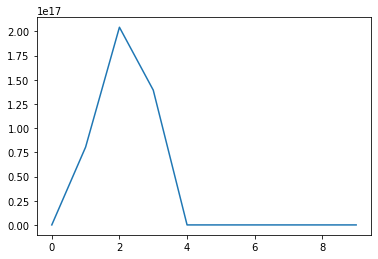

In [3]:
[x,k,error]=muller('x^2+2*x+5',-1,0,5,10^-8,20)

x =  (-1-2j)
k =  10
error =  5.845994348697835e-12


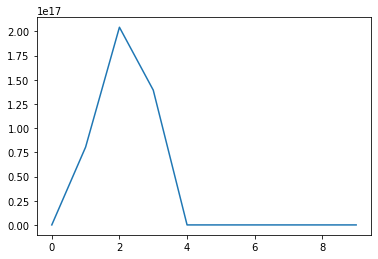

In [4]:
muller(f,-1,0,5,1e-8,20)

<a id='puntofijo'></a>
<h2><span style="color: #993300;"><span style="text-decoration: underline;"><strong>M&eacute;todo 6:</strong> Punto Fijo</span></span></h2>

<h3><strong>a) Formulaci&oacute;n Matem&aacute;tica</strong></h3>

$$\color{blue} { f(x)=\phi(x) -x }$$

<h3><strong>b) Valores Iniciales</strong></h3>

* Intervalo $[a,b]$ 

<h3><strong>c) Ventajas y Desvantajas</strong></h3>

**Ventajas**
* Es un metodo considerado simple.
* Posee condiciones para asegurar la convergencia. Es condición necesaria que $|f'(x)| < 1$ en cercanías de la raíz

**Desventajas**

* La convergencia depende de la magnitud de $f’(x)$.
* Posee la necesidad de construir funciones $f(x)$ para iterar.

<h3><strong>d) Pasos del m&eacute;todo (Pseudoc&oacute;digo)</strong></h3>

<div class="alert alert-block alert-info">
    
    
<p><span style="text-decoration: underline;"><span style="text-decoration: underline;"><strong>Valores Iniciales:</strong></span></span> Intervalo $[a,b]$</p>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 1:</span> Determinamos el valor de la función $\phi(x)$</p>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 2:</span> Determinamos existencia y unicidad de la funcion $\phi(x)$, calculando $\phi'(x)$ y $\phi''(x)$ </p>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 3:</span> Determinamos un valor de $x_k$ = $\phi(r)$</p>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 4:</span> Iteramos hasta que  $\phi(x_k)-x_k$ sea menor que la toleracia aceptada</p>

</div>

<h3><strong>e) C&oacute;digo en GNU Octave</strong></h3>

In [ ]:
function [x,k,error]=punto_fijo (f,a,b,tol,iterMax)

    %Esta función aproxima la solución de la ecuación f(x)=0, utilizando el método de la bisección
    %
    %Sintaxis:  punto_fijo(f,a,b,tol,iterMax)
    % 
    %Parámetros Iniciales: 
    %            f = una  cadena de caracteres (string) que representa a la función f
    %            a,b = son los extremos del intervalo [a,b]
    %            tol = un número positivo que representa a la tolerancia para el criterio |f(x_k)|<tol
    %            iterMax = cantidad de iteraciones máximas
    %            
    %Parámetros de Salida:                           
    %            x = aproximación del cero de la función f
    %            k = número de iteraciones realizados
    %            error =  |f(x)-x|

    aux = strcat('@(x)',f); % @x + función
    f1 = str2func(aux); % función string a ecuación

    k=0;
    x=f1(a)
    error=tol+1;
    e=[];
    while and(error>tol,k<iterMax)
        k=k+1;
        x=f1(a);
        error=abs(f1(x)-x);
        e=[e error];
    end
    plot(1:k,e)

end

<h3><strong>f) C&oacute;digo en Python</strong></h3>

In [6]:
import math
import matplotlib.pyplot as plt
from sympy import *

def f(x):
    return math.log(2*x+1)

def punto_fijo(f1,a,b,tol,iterM):
    #Esta función aproxima la solución de la ecuación f(x)=0, utilizando el método del punto fijo
    #sintaxis punto_fijo(f1,a,b,tol,iterM)
    #Entradas:
        #Entra una funcion definida arriba, a su vez dos numeros a y b los cuales
        #seran los valores iniciales 
        
    #Salidas:
        #Muestra una grafica con los valores de el error 
        #Muestra la ultima iteracion y su valor calculado
    x=a
    e=[]
    k=0
    error=tol+1
    while (k < iterM) and (error>tol):
        x=f1(x)
        error = abs(f1(x)-x)
        k+=1
        e=e+[error]
            
    #Grafica el valor de las distintas soluciones
    plt.plot(e)
    #El valor de la ultima iteracion se muestra
    print("x = ",x)
    print("k = " ,k)
    print("error = ",error)

<h3><strong>h) Ejemplo numérico</strong></h3>

<div class="alert alert-block alert-info">
    
Determinar la solucion de la ecuacion: 
$$e^x-2x-1=0$$
* Utilizando 20 iteraciones maximas
* Utilizar tolerancia $10^{-8}$
* Utilizar intervalo $[1,2]$
* Utilizando $\phi(x)=\ln(2x+1)$
</div>

x =  1.256427241061667
k =  20
error =  1.7086835601975991e-06


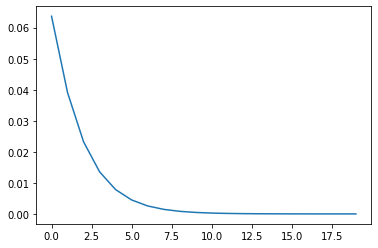

In [8]:
[x,k,error]=punto_fijo('ln(2x+1)',1,2,10^-8,20)

x =  1.256427241061667
k =  20
error =  1.7086835601975991e-06


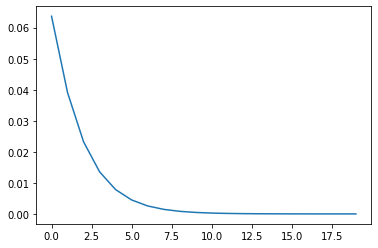

In [7]:
punto_fijo(f,1,2,1e-8,20)